# <font color='maroon'>Sampling</font>

We've discussed sampling a great deal so far in this programme. In a resource-constrained reality, measuring every single item in a population is impractical, non-feasible, expensive and in diplomatic terms, not very smart. As such, having means to sample a population makes practical and business sense. In some cases, simulations of sampling make even more sense because one can get an idea of what to expect before actually measuring samples.

In this lesson, we learn about random numbers in Python. We also learn how to use them in sampling methods such as simple random sampling and cluster sampling. We also go through selecting a subset from a larger dataset, a skill that you will likely apply in your actual work with datasets of different kinds.

## Generating random numbers

We can program computers to pick random numbers or random items from a list. Python provides the Random module that allows us to do just that. The module contains random numbers generated from different distributions. So you can generate random numbers that are uniformly distributed or normally distributed, or numbers that follow a Poisson distribution. We import the Random module for this.

In [0]:
import random as rnd

With Random you can pick integers between a closed interval [a,b].

In [0]:
rnd.randint(0,9)

7

The function `random.randrange(start, stop[, step])`  will return an integer between `start` and `stop`, excluding `stop`, and separated by a `step` size.

In [0]:
rnd.randrange(0,10,2)

0

In [0]:
rnd.choice(range(100)) #this selects any number upto 100

45

In [0]:
rnd.choice(['sugar','salt','pepper'])# selects any random option from the range provided

'salt'

`random.choice` works with a sequence of any type and performs a uniform selection, that is, each item has an equal chance of being selected.

You may want to specify where a random number generator start to generate random numbers by using the `seed()` function. If unspecified, the seed starts with the current timestamp on the machine in use. Check the Python documentation for more on this.

In [0]:
rnd.seed(4)

## Simple Random Sampling

Statisticians use samples to study the whole population. It is easier, quicker, less resource intensive to study a sample. It may also be impossible to identify each individual person or observation in a population and collect data on them. Therefore, we sample the population and make inferences based on the sample. With simple random sampling, each individual or observation has an equal probability of being selected into the sample. Individuals or observations are selected into the sample using a random number generator. We study the sample mean, denoted $\overline{X}$ and standard errors (deviation), denoted $S$.



Let's use the <a href="http://socr.ucla.edu/docs/resources/SOCR_Data/SOCR_Data_Dinov_020108_HeightsWeights.html">SOCR Data Dinov 020108 HeightsWeights</a> data set to create four samples of different sizes.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from wand.image import Image
from wand.display import display

In [0]:
%matplotlib inline

In [0]:
data = pd.read_csv('weight-and-height.csv', sep=',')
print(data.shape)
print(data.describe())

(25000, 3)
              Index  Height(Inches)  Weight(Pounds)
count  25000.000000    25000.000000    25000.000000
mean   12500.500000       67.993114      127.079421
std     7217.022701        1.901679       11.660898
min        1.000000       60.278360       78.014760
25%     6250.750000       66.704397      119.308675
50%    12500.500000       67.995700      127.157750
75%    18750.250000       69.272958      134.892850
max    25000.000000       75.152800      170.924000


In [0]:
samples = []
n = 500   # number of samples
j = 5000  # size of each sample
for i in range(n):
    samples.append(rnd.sample(list(data['Height(Inches)']), k=j)) # take 500 samples from the Height and Weight dataset, each size 5000
  

In the next line of code we verify that samples has len 500 and that the first entry in samples contains 5000 data points.

In [0]:
print(len(samples), len(samples[0]))

500 5000


The list `samples` contains the results of sampling randomly from the given dataset 500 times. Each time, we sample 5000 data points. This should give us a good representation of the population. We now determine the mean and standard deviations of the samples generated.

In [0]:
means = [np.asarray(i).mean() for i in samples]
devis = [np.asarray(i).std() for i in samples]

The *Central Limit Theorem* is a fundamental theorem in Statistics that when we take larger and larger samples from a population with replacement then the distribution of the sample means will be approximately normally distributed, or Gaussian. 

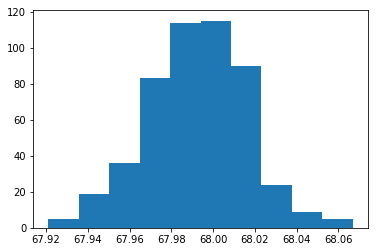

In [0]:
plt.hist(means);

You'll see that as the sample size gets bigger, the distribution starts to look more symmetric.

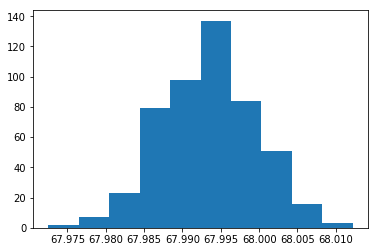

In [0]:
samples2 = []
n = 500   # number of samples
j = 20000  # size of each sample
for i in range(n):
    samples2.append(rnd.sample(list(data['Height(Inches)']), k=j)) # take 500 samples from the Height and Weight dataset, each size 5000
    
means2 = [np.asarray(i).mean() for i in samples2]

plt.hist(means2);


This is the Central Limit Theorem and it holds for data that follows any distribution, be it a Poisson or Binomial distribution.

## Stratified sampling

Stratified sampling divides the entire data set into non-overlapping subsets called strata. 

The strata are created to highlight a specific subset or subgroup of the data. Features such as demographics or gender can be used to stratify data. And help you answer questions about how representative those variables are of the population.  
 

We'll show you how to create stratified random sample. We can either sample proportionally (i.e., sample the same fraction from each subset or stratum), or we can sample disproportionally, where strata have different sampling proportions.  

**The data.** With the smoking and pregnancy data set, we can create two subsets based on the variable `Sex`. We use the function `groupby` to do so.

In [0]:
data = pd.read_csv('smoking-and-pregnancy.csv', sep=';')
print(data.head())
print(data.shape)
print(data.groupby('Sex').count()) #group and count available data entries

   GestationalAge   Sex  Birthweight  Birthlength Smoking  CigarettesPerDay
0             281   boy         3.35         54.0       Y               NaN
1             265  girl         3.72         48.0       Y               NaN
2             274  girl         3.10         50.0       N               NaN
3             291  girl         4.58         57.0       Y              15.0
4             290   boy         3.20         49.0       N               NaN
(128, 6)
      GestationalAge  Birthweight  Birthlength  Smoking  CigarettesPerDay
Sex                                                                      
boy               65           65           65       65                 9
girl              63           63           61       63                14


We'll use proportional stratified sampling to group the data according to gender. The Python function `sample()` let's us specify what proportion we'd like for each subgroup. In this case we'll take 10%  from each group using the function `sample()`.

In [0]:
stratified = data.groupby('Sex').apply(lambda x: x.sample(frac=0.1))

Let's look at `Birthweight`: we'll determine the average for each subset by first getting the `Birthweight` from the groupby object `stratified`, then unstacking to form a new Pandas dataframe. And finally rotating the rows and colums with the `transpose` function. 

In [0]:
df = pd.DataFrame(stratified['Birthweight'].unstack()).transpose()

In [0]:
df['boy'].mean(), df['girl'].mean()

(3.6300000000000003, 3.508333333333333)

### Exercise

For this exercise, you'll work with the `GestationalAge` and `Birthlength` variables in the given dataset. First, stratify the data. Then choose appropriate visualisations to show the distribution of the data points for the subsets or strata given the two variables. Determine the mean and standard deviations of the stratified random sample. Use the same approach as above with `unstack` and `transpose` if you get stuck.

### References

<a href="https://docs.python.org/3/library/random.html"> The Python Standard Library: Generate pseudo-random numbers</a>